In [1]:
import pandas as pd

reviews_df = pd.read_csv("Hotel_Reviews.csv")

In [2]:
reviews_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [4]:
reviews_df['review'] = reviews_df['Negative_Review'] + reviews_df['Positive_Review']

In [5]:
reviews_df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng', 'review'],
      dtype='object')

In [6]:
reviews_df['is_bad_review'] = reviews_df['Reviewer_Score'].apply(lambda x: 1 if x<5 else 0)

In [7]:
reviews_df = reviews_df[['review','is_bad_review']]
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 2 columns):
review           515738 non-null object
is_bad_review    515738 non-null int64
dtypes: int64(1), object(1)
memory usage: 7.9+ MB


In [9]:
reviews_df.describe(include='all')

,review,is_bad_review
count,515738,515738.000000
unique,499288,NaN
top,No Negative Location,NaN
freq,1009,NaN
mean,NaN,0.043202
std,NaN,0.203312
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,0.000000


In [10]:
bkup = reviews_df

In [11]:
reviews_df = reviews_df.sample(frac=0.1, replace=False,random_state=42)

In [12]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51574 entries, 488440 to 273809
Data columns (total 2 columns):
review           51574 non-null object
is_bad_review    51574 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [13]:
reviews_df['review'] = reviews_df['review'].apply(lambda x: x.replace("No Negative","").replace("NO POsitive",""))

In [19]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN   

In [20]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    #lower text
    text = text.lower()
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    text = [word for word in text if not any(c.isdigit() for c in word)]
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    text = [t for t in text if len(t) > 0]
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    text = [t for t in text if len(t)> 0]
    text = " ".join(text)
    return(text)

In [22]:
reviews_df['review_clean'] = reviews_df['review'].apply(lambda x: clean_text(x))

In [23]:
reviews_df.head()

,review,is_bad_review,review_clean
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...
274649,No tissue paper box was present at the roomNo...,0,tissue paper box present roomno positive
374688,Pillows Nice welcoming and service,0,pillow nice welcome service
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...
451596,Lovely hotel v welcoming staff,0,lovely hotel v welcome staff


In [24]:
#feature engineering
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df['sentiments'] = reviews_df['review'].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'],axis=1), reviews_df['sentiments'].apply(pd.Series)],axis=1)

In [25]:
reviews_df.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924
274649,No tissue paper box was present at the roomNo...,0,tissue paper box present roomno positive,0.159,0.580,0.261,0.3400
374688,Pillows Nice welcoming and service,0,pillow nice welcome service,0.000,0.345,0.655,0.6908
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153
451596,Lovely hotel v welcoming staff,0,lovely hotel v welcome staff,0.000,0.230,0.770,0.7717


In [26]:
reviews_df['nb_chars'] = reviews_df['review'].apply(lambda x: len(x))
reviews_df['nb_words'] = reviews_df['review'].apply(lambda x: len(x.split(" ")))

In [27]:
reviews_df.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924,599,113
274649,No tissue paper box was present at the roomNo...,0,tissue paper box present roomno positive,0.159,0.580,0.261,0.3400,55,11
374688,Pillows Nice welcoming and service,0,pillow nice welcome service,0.000,0.345,0.655,0.6908,36,7
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153,155,27
451596,Lovely hotel v welcoming staff,0,lovely hotel v welcome staff,0.000,0.230,0.770,0.7717,32,7


In [31]:
#create words to vector
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc,[i]) for i,doc in enumerate(reviews_df['review_clean'].apply(lambda x: x.split(" ")))]

#train the moel with our text data 
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

In [33]:
# transform to vector data 
doc2vec_df = reviews_df['review_clean'].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.head()

,0,1,2,3,4
488440,-0.103873,-0.005343,0.121462,-0.149480,0.138327
274649,0.073376,-0.214096,0.007264,-0.076131,-0.021030
374688,0.086117,-0.012806,0.043171,0.034671,0.066732
404352,0.085843,-0.079799,-0.013436,0.035909,0.161123
451596,-0.005892,0.056324,-0.087835,-0.012469,0.066048


In [34]:
doc2vec_df.columns = ['doc2vec_vector_' + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df],axis=1)

In [35]:
# add tf-idf columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=10)
tfidf_result = tfidf.fit_transform(reviews_df['review_clean']).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns=tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df,tfidf_df],axis=1)

In [36]:
reviews_df.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,...,word_yet,word_yoghurt,word_yogurt,word_young,word_yr,word_yummy,word_zero,word_ziggo,word_zone,word_zuid
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924,599,113,-0.103873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274649,No tissue paper box was present at the roomNo...,0,tissue paper box present roomno positive,0.159,0.580,0.261,0.3400,55,11,0.073376,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
374688,Pillows Nice welcoming and service,0,pillow nice welcome service,0.000,0.345,0.655,0.6908,36,7,0.086117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153,155,27,0.085843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451596,Lovely hotel v welcoming staff,0,lovely hotel v welcome staff,0.000,0.230,0.770,0.7717,32,7,-0.005892,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
#Data analysis
reviews_df['is_bad_review'].value_counts(normalize=True)

0    0.956761
1    0.043239
Name: is_bad_review, dtype: float64

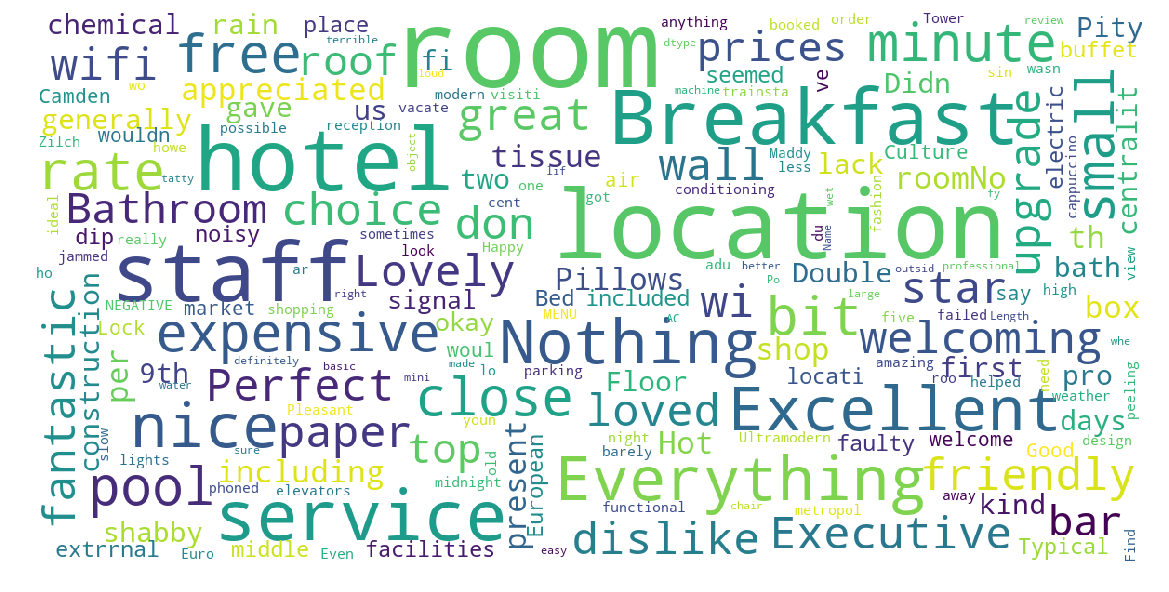

In [40]:
#wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=42    
    ).generate(str(data))

    fig = plt.figure(1,figsize = (20,20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(reviews_df['review'])

In [41]:
# positive more than 5 words
reviews_df[reviews_df['nb_words']>=5].sort_values("pos", ascending=False)[['review','pos']].head(10)

,review,pos
43101,A perfect location comfortable great value,0.931
211742,Clean comfortable lovely staff,0.907
175551,Friendly welcome Comfortable room,0.905
365085,Good location great value,0.904
109564,Clean friendly and comfortable,0.902
145743,Good value amazing location,0.901
407590,breakfast excellent Clean comfort,0.899
407546,Great place I enjoyed,0.881
218571,Beautiful Quirky Comfortable,0.878
128308,Super friendly staff,0.877


In [42]:
# Negative more than 5 words
reviews_df[reviews_df['nb_words']>=5].sort_values("neg", ascending=False)[['review','neg']].head(10)

,review,neg
193086,No dislikes LOCATION,0.831
356368,Nothing Great helpful wonderful staff,0.812
318516,A disaster Nothing,0.804
458794,Nothing Excellent friendly helpful staff,0.799
29666,A bit noisy No,0.796
263187,Very bad service No,0.758
443796,Nothing perfect,0.750
175316,Nothing Super friendly staff,0.743
174178,no bad experience location,0.740
50226,Nothing Lovely friendly hotel,0.740


C:\Users\Santhosh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


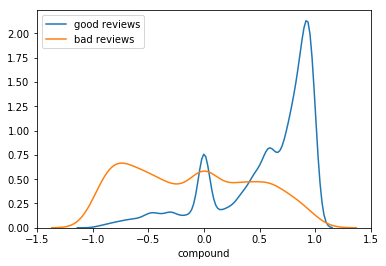

In [43]:
import seaborn as sns

for x in [0,1]:
    subset = reviews_df[reviews_df['is_bad_review'] == x]
    
    #draw density plot
    if x ==0:
        label = "good reviews"
    else:
        label = "bad reviews"
    sns.distplot(subset['compound'], hist=False, label=label)

In [44]:
# modelling is_bad_review
#feature selection
label = 'is_bad_review'
ignore_cols = ['label','review','review_clean']

features = [c for c in reviews_df.columns if c not in ignore_cols]

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size =0.20, random_state=42)

In [46]:
#train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [48]:
#show import features
feature_importance_df = pd.DataFrame({"feature":features,"importance":rf.feature_importances_}).sort_values("importance", ascending=False)
feature_importance_df.head(20)


,feature,importance
0,is_bad_review,0.441174
4,compound,0.023347
3,pos,0.015312
1,neg,0.014526
2544,word_positive,0.009945
7,doc2vec_vector_0,0.009619
9,doc2vec_vector_2,0.008558
10,doc2vec_vector_3,0.007994
2,neu,0.007324
5,nb_chars,0.007300


In [56]:
rf.score(X_test,y_test)

0.9995152690256908

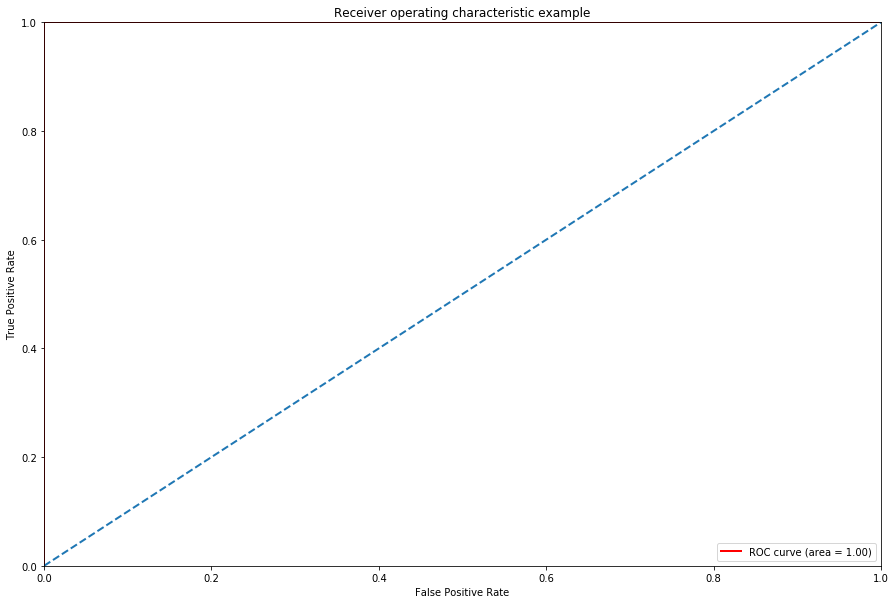

In [54]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5,1,'2-class Precision-Recall curve: AP=1.00')

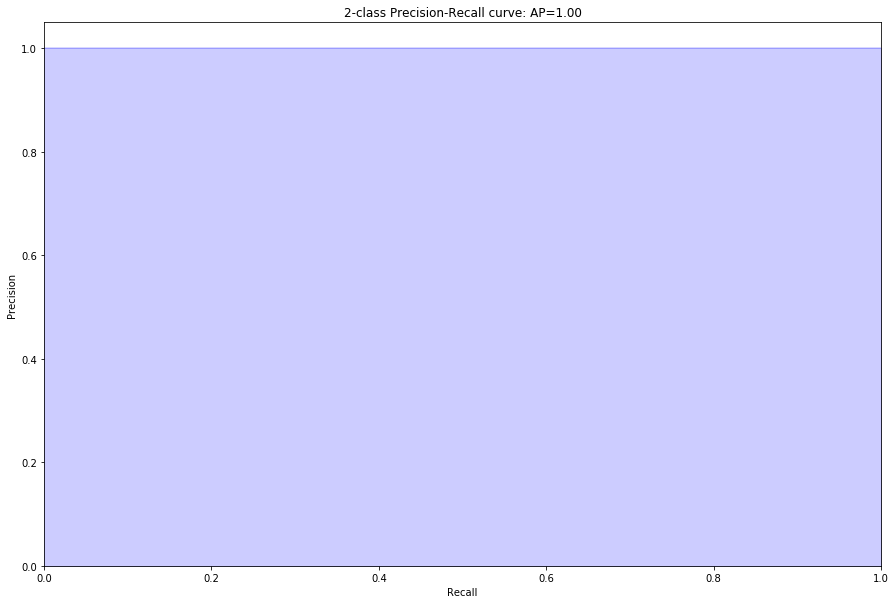

In [55]:
# PR curve

from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.utils.fixes import signature

average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))